### The objective is to determine the salary of an engineering graduate in India.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
#Read the data
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/training_set_label.csv")
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
#Load the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/testing_set_label.csv')
test_data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,239903,m,1989-09-25,92.8,0,2007,88.66,0,1866,2,...,-1,-1,-1,473,-1,-1.1901,-0.4353,-2.0856,2.0599,-0.2875
1,948661,m,1991-03-07,75.0,icse,2010,67.75,nios,13209,2,...,500,-1,-1,-1,-1,-0.8772,-0.4536,0.6248,-0.1076,0.6721
2,390079,m,1991-02-17,79.2,karnataka secondary education examination board,2008,59.00,department of pre-university eduction,6575,2,...,-1,-1,-1,-1,-1,1.4374,0.5008,-0.3803,0.6498,0.6603
3,580714,f,1991-09-24,83.2,cbse,2009,80.40,cbse,8195,1,...,-1,-1,-1,-1,-1,-1.3080,1.0449,0.0100,0.3995,-0.4776
4,335896,m,1991-08-17,85.4,0,2008,88.70,0,1141,2,...,-1,-1,-1,286,-1,0.7419,1.9048,-0.0537,0.0035,-0.2875


#### Data Preprocessing

In [4]:
#Get the description of data
data.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [5]:
#Get the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [6]:
#Check for null values
data.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [7]:
#Divide the data into numeric and categorical data
num_data = data._get_numeric_data()
num_cols = num_data.columns
cat_cols = list(set(data.columns) - set(num_cols))

#### Analysis of Numeric data

In [8]:
num_data.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,87.80,2009,84.00,6920,1,73.82,6920,1,2013,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,57.00,2010,64.50,6624,2,65.00,6624,0,2014,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,77.33,2007,85.17,9084,2,61.94,9084,0,2011,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,84.30,2009,86.00,8195,1,80.40,8195,1,2013,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,82.00,2008,75.00,4889,2,64.30,4889,1,2012,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


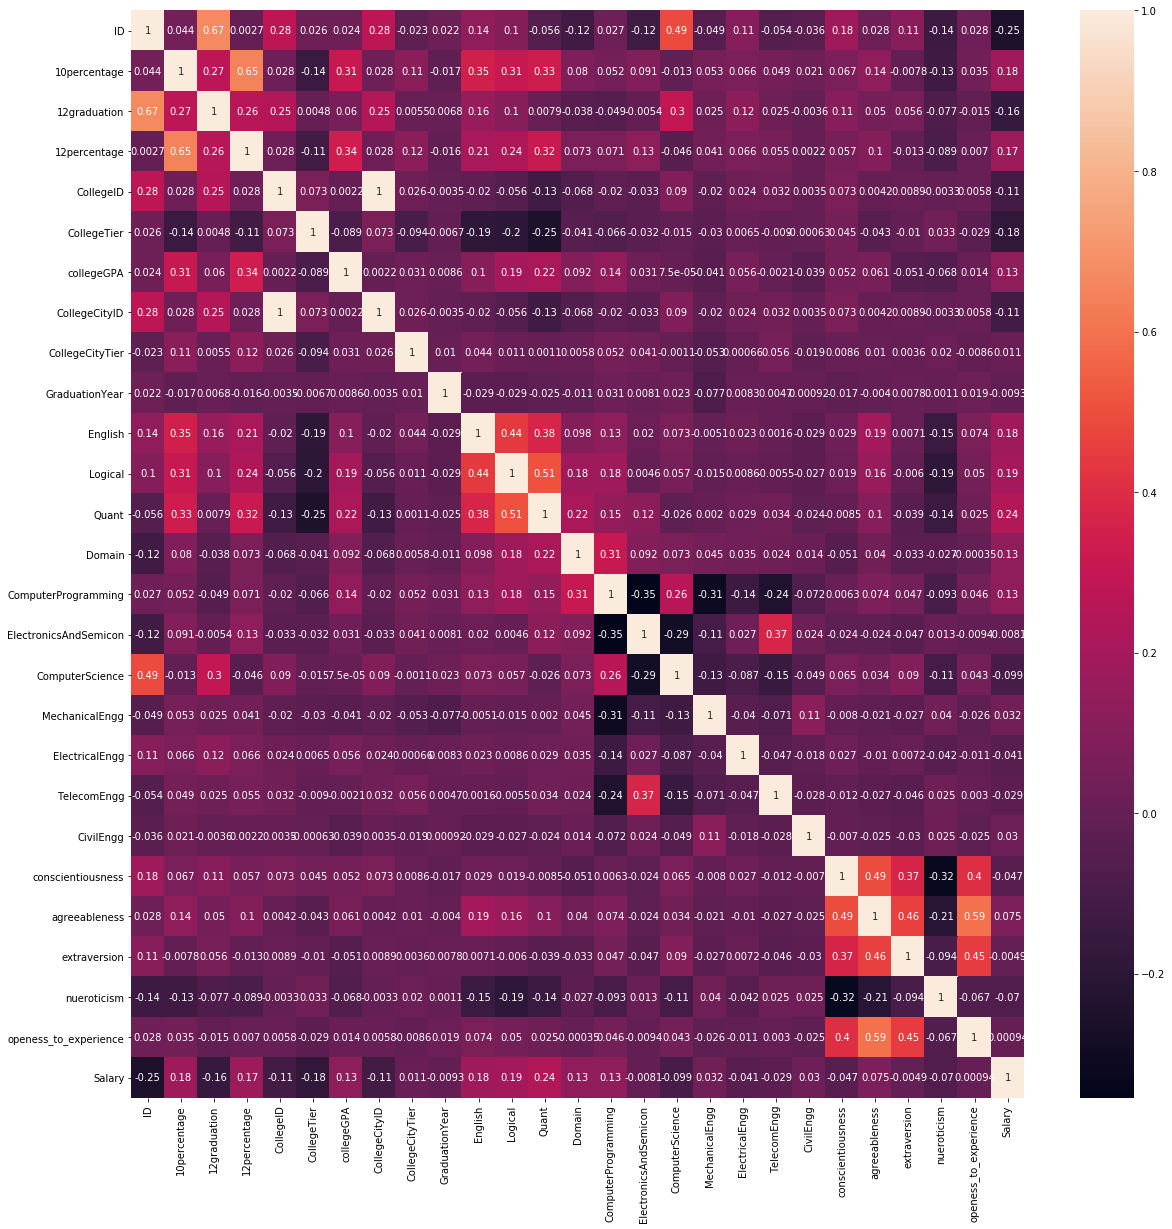

In [9]:
#View the correlation matrix
plt.rcParams['figure.figsize'] = 20, 20
sns.heatmap(num_data.corr(), annot=True)

In [10]:
#Remove the unimportant columns and columns with correlation < 0.1 with salary
data.drop(['ID', 'CollegeCityTier', 'ElectronicsAndSemicon', 'openess_to_experience', 'nueroticism', 'extraversion', 'agreeableness', 'extraversion', 'conscientiousness'], axis = 1, inplace=True)
num_data.drop(['ID', 'CollegeCityTier', 'ElectronicsAndSemicon', 'openess_to_experience', 'nueroticism', 'extraversion', 'agreeableness', 'extraversion', 'conscientiousness'], axis = 1, inplace=True)
test_data.drop(['ID', 'CollegeCityTier', 'ElectronicsAndSemicon', 'openess_to_experience', 'nueroticism', 'extraversion', 'agreeableness', 'extraversion', 'conscientiousness'], axis = 1, inplace=True)

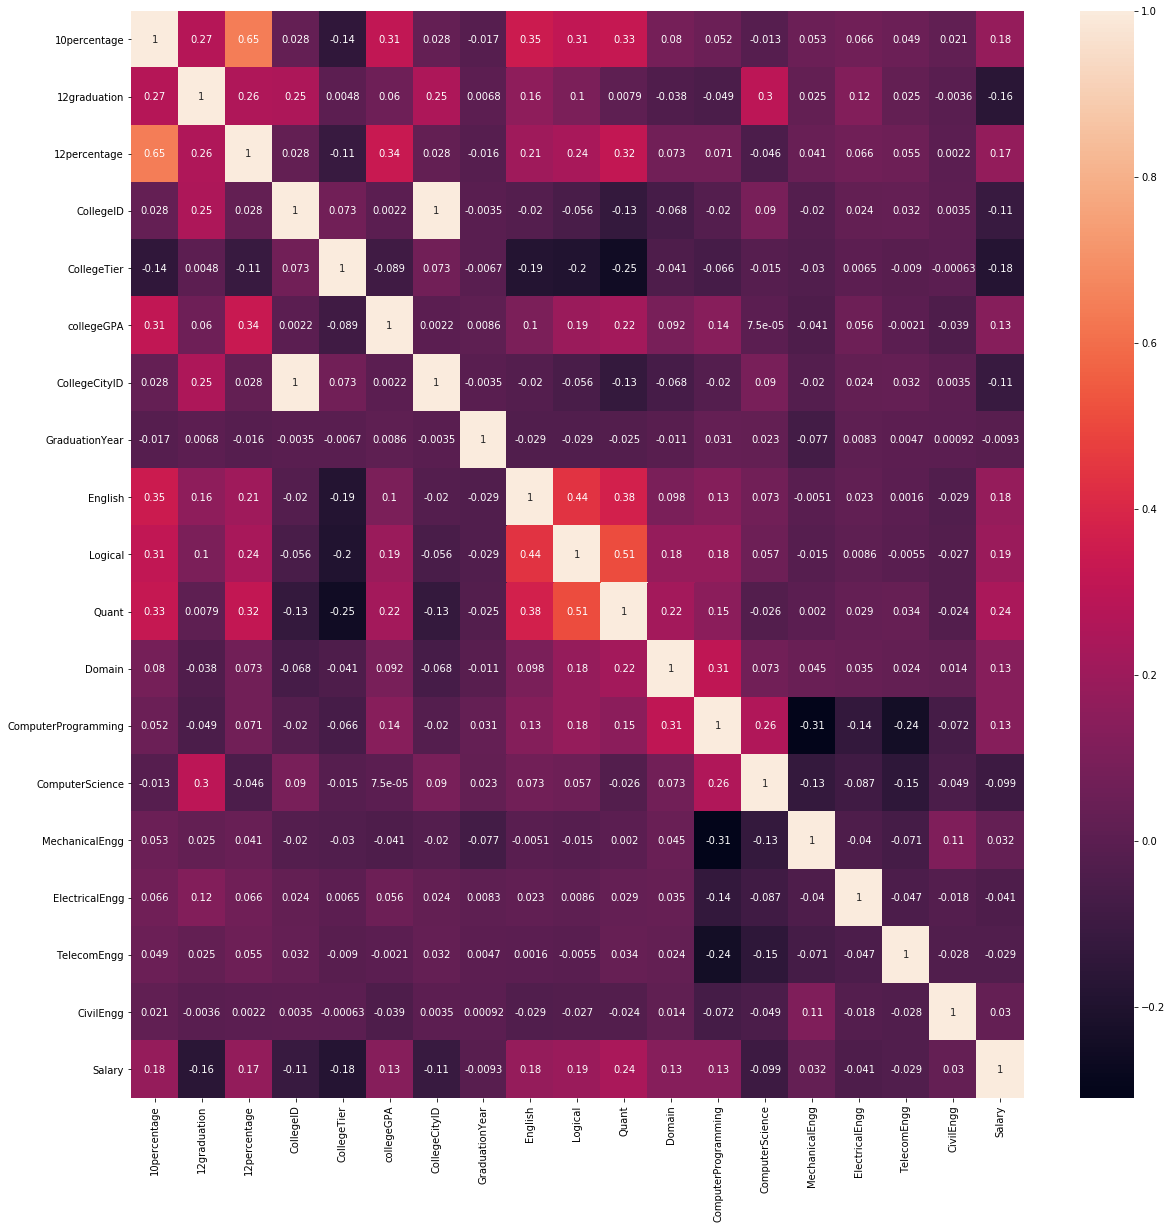

In [11]:
sns.heatmap(num_data.corr(), annot=True)

#### Analysis of Categorical data

In [12]:
cat_data = data[cat_cols]
cat_data.head()

,Specialization,Degree,10board,12board,CollegeState,DOB,Gender
0,instrumentation and control engineering,B.Tech/B.E.,cbse,cbse,Delhi,1990-10-22,f
1,computer science & engineering,B.Tech/B.E.,cbse,cbse,Uttar Pradesh,1990-05-15,m
2,electronics & telecommunications,B.Tech/B.E.,"maharashtra state board,pune",amravati divisional board,Maharashtra,1989-08-21,m
3,computer science & engineering,B.Tech/B.E.,cbse,cbse,Delhi,1991-05-04,m
4,biotechnology,B.Tech/B.E.,cbse,cbse,Tamil Nadu,1990-10-30,f


In [13]:
#View the number of unique values in each column
for col in cat_cols:
    print(data[col].value_counts())

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
electronics and instrumentation engineering     18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

In [14]:
#Remove the unnecessary and columns with highly imbalance values
data.drop(['DOB', 'Degree'], axis=1, inplace=True)
test_data.drop(['DOB', 'Degree'], axis=1, inplace=True)
cat_data.drop(['DOB', 'Degree'], axis=1, inplace=True)

We need to Label Encode the categorical data and for that, we need to split the data into train and validation and then preform preprocessing. Due to many columns having single value of particular type, there is chance that while label encoding, the value might not be in train data and give error. So we will convert the categorical data into as less categories as possible.

In [15]:
cat_data.head()

,Specialization,10board,12board,CollegeState,Gender
0,instrumentation and control engineering,cbse,cbse,Delhi,f
1,computer science & engineering,cbse,cbse,Uttar Pradesh,m
2,electronics & telecommunications,"maharashtra state board,pune",amravati divisional board,Maharashtra,m
3,computer science & engineering,cbse,cbse,Delhi,m
4,biotechnology,cbse,cbse,Tamil Nadu,f


In [16]:
cat_data['12board'].value_counts()

cbse                                           1039
state board                                     948
0                                               264
icse                                            101
up board                                         74
                                               ... 
ibe                                               1
state board of technical education harayana       1
bihar school examination board patna              1
karnataka pre unversity board                     1
international baccalaureate (ib) diploma          1
Name: 12board, Length: 277, dtype: int64

Divide the data as cbse icse or state board

In [17]:
data.loc[(data['12board'] != 'cbse') & (data['12board'] != 'icse'), '12board'] = 'state board'
test_data.loc[(test_data['12board'] != 'cbse') & (test_data['12board'] != 'icse'), '12board'] = 'state board'
cat_data.loc[(data['12board'] != 'cbse') & (data['12board'] != 'icse'), '12board'] = 'state board'
cat_data['12board'].value_counts()

state board    1858
cbse           1039
icse            101
Name: 12board, dtype: int64

In [18]:
cat_data['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
electronics and instrumentation engineering     18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

Replace the values in Specialization less than 100 as others

In [19]:
#Get the value counts of Specialization
counts = cat_data['Specialization'].value_counts()
test_counts = test_data['Specialization'].value_counts()
#Get the index with values less than 100
idx = counts[counts.lt(100)].index
idxs = test_counts[test_counts.lt(100)].index

#Replace them with other
cat_data.loc[cat_data['Specialization'].isin(idx), 'Specialization'] = 'others'
data.loc[data['Specialization'].isin(idx), 'Specialization'] = 'others'
test_data.loc[test_data['Specialization'].isin(idxs), 'Specialization'] = 'others'
cat_data['Specialization'].value_counts()

electronics and communication engineering    670
computer science & engineering               557
information technology                       506
computer engineering                         415
others                                       346
computer application                         201
mechanical engineering                       155
electronics and electrical engineering       148
Name: Specialization, dtype: int64

LabelEncode gender column

In [20]:
data = data.replace({'Gender': {'m':0, 'f':1}})
test_data = test_data.replace({'Gender': {'m':0, 'f':1}})
cat_data = cat_data.replace({'Gender': {'m':0, 'f':1}})
cat_data['Gender'].value_counts()

0    2282
1     716
Name: Gender, dtype: int64

Perform same operation for 10board like 12 board

In [21]:
data.loc[(data['10board'] != 'cbse') & (data['10board'] != 'icse'), '10board'] = 'state board'
test_data.loc[(test_data['10board'] != 'cbse') & (test_data['10board'] != 'icse'), '10board'] = 'state board'
cat_data.loc[(data['10board'] != 'cbse') & (data['10board'] != 'icse'), '10board'] = 'state board'
cat_data['10board'].value_counts()

state board    1759
cbse           1026
icse            213
Name: 10board, dtype: int64

In [22]:
cat_data.head()

,Specialization,10board,12board,CollegeState,Gender
0,others,cbse,cbse,Delhi,1
1,computer science & engineering,cbse,cbse,Uttar Pradesh,0
2,others,state board,state board,Maharashtra,0
3,computer science & engineering,cbse,cbse,Delhi,0
4,others,cbse,cbse,Tamil Nadu,1


In [23]:
data.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Specialization,collegeGPA,...,Logical,Quant,Domain,ComputerProgramming,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Salary
0,1,87.80,cbse,2009,84.00,cbse,6920,1,others,73.82,...,665,810,0.694479,485,-1,-1,-1,-1,-1,445000
1,0,57.00,cbse,2010,64.50,cbse,6624,2,computer science & engineering,65.00,...,435,210,0.342315,365,-1,-1,-1,-1,-1,110000
2,0,77.33,state board,2007,85.17,state board,9084,2,others,61.94,...,475,505,0.824666,-1,-1,-1,-1,260,-1,255000
3,0,84.30,cbse,2009,86.00,cbse,8195,1,computer science & engineering,80.40,...,620,635,0.990009,655,-1,-1,-1,-1,-1,420000
4,1,82.00,cbse,2008,75.00,cbse,4889,2,others,64.30,...,495,365,0.278457,315,-1,-1,-1,-1,-1,200000


### Split the data into features and target value

In [24]:
features = data.drop('Salary', axis=1)
target = data['Salary']

### Split the data into train and test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2398, 23)
X_test shape:  (600, 23)
y_train shape:  (2398,)
y_test shape:  (600,)


In [26]:
#Label Encode the categorical values
num_cols = features.select_dtypes('number').columns
cat_cols = list(set(features.columns) - set(num_cols))
cat_cols

['Specialization', '12board', 'CollegeState', '10board']

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    print(col)
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    test_data[col] = le.transform(test_data[col])
X_train.head()

Specialization
12board
CollegeState
10board


,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Specialization,collegeGPA,...,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
1569,0,88.17,2,2010,81.12,2,8743,2,7,64.61,...,630,570,810,-1.000000,-1,-1,-1,-1,-1,-1
2228,0,79.00,2,2009,76.00,2,4805,2,5,68.00,...,415,500,415,0.622643,405,407,-1,-1,-1,-1
2295,0,90.83,2,2005,88.77,2,2857,1,1,72.60,...,675,685,585,0.990009,655,-1,-1,-1,-1,-1
1800,0,79.60,2,2004,72.80,2,2253,2,6,75.20,...,475,565,645,0.971663,325,-1,553,-1,-1,-1
1273,1,84.00,1,2009,87.00,1,8161,2,2,80.30,...,615,470,470,0.930371,565,-1,-1,-1,-1,-1


In [28]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)

RMSE:  153329.75842381894


In [29]:
y_hat = lr_model.predict(test_data)
predictions = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)

RMSE:  161640.44265488346


In [31]:
#Random Forest Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [33]:
# rf_random.best_params_

In [34]:
rf = RandomForestRegressor(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=80, bootstrap=True)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)

RMSE:  151729.93497246056


In [35]:
y_hat = rf_model.predict(test_data)
predictions = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)
y_hat = gb_model.predict(test_data)
predictions = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

RMSE:  150252.57253348318


In [37]:
#Standardize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)
test_data_scaled = pd.DataFrame(sc.transform(test_data), columns=test_data.columns)

In [38]:
rf = RandomForestRegressor(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=80, bootstrap=True)
rf_model = rf.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)
y_hat = rf_model.predict(test_data_scaled)
predictions = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

RMSE:  151676.80927242263
